# Scientific Programming in Python
Josh Dillon, [jsdillon@berkeley.edu](mailto:jsdillon@berkeley.edu)

In this lesson, we're going to talk about the two foundational packages for data manipulation and analysis: numpy and matplotlib. The goal is a familiarity with the packages, their capabilities, and how they are structured so that you can understand and apply other capabilities they have that you might find out about via the manual or just Google/Stack Overflow.

This lesson was adapted from Josh Bloom's Python Bootcamp lectures on [numpy](https://github.com/profjsb/python-bootcamp/blob/master/Lectures/21_NumpyMatplotlib/IntroNumPy.ipynb) and [matplotlib](https://github.com/profjsb/python-bootcamp/blob/master/Lectures/21_NumpyMatplotlib/IntroMatplolib.ipynb).

In [76]:
import numpy as np

# Numpy
![](Images/numpy.png)
For more on numpy, [check out their website.](https://docs.scipy.org/doc/numpy-1.12.0/reference/)

## What are numpy arrays and how do they work?
Numpy arrays are a lot like default python lists.

In [77]:
lst = [1,2,3]
npa = np.array([1,2,3])
print 'Python list:', lst
print 'Numpy array:', npa

Python list: [1, 2, 3]
Numpy array: [1 2 3]


Lists are a bit more general...

In [78]:
lst = [1.0, 'dog', (1,2), [[5,5],[5,5]], 1.0+1.0j, {'a': 7}]
print lst

[1.0, 'dog', (1, 2), [[5, 5], [5, 5]], (1+1j), {'a': 7}]


But lists don't really have a notion of acting upon every element like we would a vector or a matrix.

In [79]:
lst = range(4)
print 'List:',lst, '* 2 =', lst*2
nparr = np.arange(4)
print 'Numpy Array:',nparr, '* 2 =', nparr*2

List: [0, 1, 2, 3] * 2 = [0, 1, 2, 3, 0, 1, 2, 3]
Numpy Array: [0 1 2 3] * 2 = [0 2 4 6]


You can always turn a numpy array back into a list. You can make a numpy array from a list, but only if it's homogenous and rectangular.

In [80]:
print list(np.arange(4))

print np.array([[1,2], [3,4]])
print np.array([10, [10,10]])

[0, 1, 2, 3]
[[1 2]
 [3 4]]


ValueError: setting an array element with a sequence.

## Array slicing and multidimensional arrays
It's easy to initialize numpy arrays of ones or zeros, even in higher dimensions

In [81]:
ones_1d = np.ones(5)
zeros_2d = np.zeros((3,5))
print ones_1d, '\n\n', zeros_2d

[ 1.  1.  1.  1.  1.] 

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


And numpy supports all sorts of very useful list slicing (this takes some time to visualize and master).

In [82]:
nparr = np.arange(10)
print 'Full array:', nparr
print 'First element:', nparr[0]
print 'Second element:', nparr[1]
print 'Last element:', nparr[-1]
print 'Second-to-last element:', nparr[-2]
print 'First three elements:', nparr[0:3]
print 'Even elements:', nparr[0::2]
print 'Odd elements:', nparr[1::2]
print 'First three odd elements:',nparr[1:6:2] 

Full array: [0 1 2 3 4 5 6 7 8 9]
First element: 0
Second element: 1
Last element: 9
Second-to-last element: 8
First three elements: [0 1 2]
Even elements: [0 2 4 6 8]
Odd elements: [1 3 5 7 9]
First three odd elements: [1 3 5]


In [83]:
rand_2d = np.random.rand(4,3) #random numbers between 0 and 1
print '2d random array:\n', rand_2d
print '\nFirst row:\n', rand_2d[0,:]
print '\nLast column:\n', rand_2d[:,-1]
print '\nTop left 2x2 square:\n', rand_2d[0:2,0:2]

2d random array:
[[ 0.54903796  0.39310672  0.57497911]
 [ 0.61068568  0.26097664  0.62398503]
 [ 0.08666914  0.97784325  0.1674784 ]
 [ 0.02891434  0.50698963  0.26456608]]

First row:
[ 0.54903796  0.39310672  0.57497911]

Last column:
[ 0.57497911  0.62398503  0.1674784   0.26456608]

Top left 2x2 square:
[[ 0.54903796  0.39310672]
 [ 0.61068568  0.26097664]]


You can even index an array with an array of booleans or integer indices.

In [84]:
test1 = np.arange(10)
test2 = 2*np.arange(10)
print 'test1 =', test1
print 'test2 =', test2
print 'Are elements of test1 > 4?', test1 > 4
print 'Elements of test2 where corresponding element of test1 > 4:', test2[test1 > 4]
print 'Elements of test2 where corresponding element of test2 > 4:', test2[test2 > 4]
print 'Elements 3, 1, and 4 of test2:', test2[[3,1,4]]

test1 = [0 1 2 3 4 5 6 7 8 9]
test2 = [ 0  2  4  6  8 10 12 14 16 18]
Are elements of test1 > 4? [False False False False False  True  True  True  True  True]
Elements of test2 where corresponding element of test1 > 4: [10 12 14 16 18]
Elements of test2 where corresponding element of test2 > 4: [ 6  8 10 12 14 16 18]
Elements 3, 1, and 4 of test2: [6 2 8]


## Numpy arrays can be so much faster than lists for manipulating data
Under the hood, numpy arrays use C code (which is much faster than Python, generally speaking) to perform common mathematical algorithms very quickly.

In [85]:
print 'Square each number in x and then append it to a list...'
arr = []
x = range(10000)
%timeit -n 1000 for k in x: arr.append(k**2)

print '\nDo the same but with list comprehension...'
x = range(10000)
%timeit -n 1000 [k**2 for k in x]

print '\nNow try with numpy...'
x = np.arange(10000)
%timeit -n 1000 x**2

Square each number in x and then append it to a list...
1000 loops, best of 3: 1.09 ms per loop

Do the same but with list comprehension...
1000 loops, best of 3: 590 µs per loop

Now try with numpy...
1000 loops, best of 3: 3.99 µs per loop


## Numpy also lets you do other math on arrays 
(You can often also do this on lists too, though the output will generally be numpy arrays)

In [86]:
print np.pi
print np.e

sines = np.sin([np.pi/4 * n for n in range(4)])
print sines
print type(sines) 

3.14159265359
2.71828182846
[ 0.          0.70710678  1.          0.70710678]
<type 'numpy.ndarray'>


This is especially useful for doing statistics.

In [88]:
vec1 = np.arange(6)
print 'vec1: ', vec1
print 'sum:', np.sum(vec1)
print 'mean:', np.mean(vec1)
print 'median:', np.median(vec1)
print 'standard deviation:', np.std(vec1)

vec1:  [0 1 2 3 4 5]
sum: 15
mean: 2.5
median: 2.5
standard deviation: 1.70782512766


More importantly, numpy is optimized for vector and matrix operations. In general, array operations are performed element-wise:

In [89]:
arr1 = np.arange(10)
arr2 = 2*np.arange(10)
print 'Multiplication arr1*arr2:\n', arr1 * arr2
print 'Complex scalar multiplication and vector subtraction:\n', 3.0*arr2 - 1.5j*arr1
mat1 = np.array([[1,2],[3,4]])
mat2 = np.array([[0,1],[2,3]])
print '\nmat1 * mat2 =\n', mat1 * mat2
print 'mat1 - mat2 =\n', mat1 - mat2

Multiplication arr1*arr2:
[  0   2   8  18  32  50  72  98 128 162]
Complex scalar multiplication and vector subtraction:
[  0. +0.j    6. -1.5j  12. -3.j   18. -4.5j  24. -6.j   30. -7.5j
  36. -9.j   42.-10.5j  48.-12.j   54.-13.5j]

mat1 * mat2 =
[[ 0  2]
 [ 6 12]]
mat1 - mat2 =
[[1 1]
 [1 1]]


However, we'll often want to do special vector-vector or matrix-vector or matrix-matrix operations in numpy. In particular, np.dot() is a very useful multipurpose tool

In [90]:
vec1 = np.array(range(5))
vec2 = np.array([-1,0,1,-1,0])
mat = np.ones((3,5))

print 'Sum of vec1**2:', np.sum(vec1**2)
print 'vec1 dot vec1:', np.dot(vec1,vec1)
print 'vec1 dot vec2:', np.dot(vec1,vec2)
print 'mat dot vec1:\n', np.dot(mat,vec1)
print 'mat times mat transpose:\n', np.dot(mat,mat.T)
print 'mat transpose times mat:\n', np.dot(mat.T,mat)

Sum of vec1**2: 30
vec1 dot vec1: 30
vec1 dot vec2: -1
mat dot vec1:
[ 10.  10.  10.]
mat times mat transpose:
[[ 5.  5.  5.]
 [ 5.  5.  5.]
 [ 5.  5.  5.]]
mat transpose times mat:
[[ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]]


## CODING BREAKOUT: Sum of all multiples of 3 and 5

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23. **Find the sum of all the multiples of 3 or 5 below 1000.**

(This is problem 1 of [Project Euler](https://projecteuler.net/), a mathematics and coding challenge available free online.)

**Hint:** use boolean indexing of numpy arrays. **Extra challenge:** try to solve it in one line.

In [91]:
#Try out your solution here.

## File input and output with Numpy
Numpy lets you save multiple arraus into a dictionary of objects. 

In [92]:
x = np.arange(10)
y = np.random.rand(10)
np.savez('test_file', x=x, y=y)
test = np.load('test_file.npz')
print 'keys:', test.keys()
print 'x:', test['x']
print 'y:', test['y']
!rm test_file.npz #deletes the file using unix commands

keys: ['y', 'x']
x: [0 1 2 3 4 5 6 7 8 9]
y: [ 0.06432569  0.44954327  0.47875769  0.5129082   0.19748983  0.52659301
  0.08177711  0.28746598  0.20839819  0.227146  ]


# Matplotlib
![](Images/matplotlib.svg)
For more on matplotlib, [check out their website.](https://matplotlib.org/devdocs/index.html)

## Basic plotting with Matplotlib

In [93]:
import matplotlib.pyplot as plt
%matplotlib notebook 
# This bit of jupyter magic embeds interactive figures 

The most basic unit is plotting is a figure, an object that contains axes, lines, etc. Create one like this:

<IPython.core.display.Javascript object>


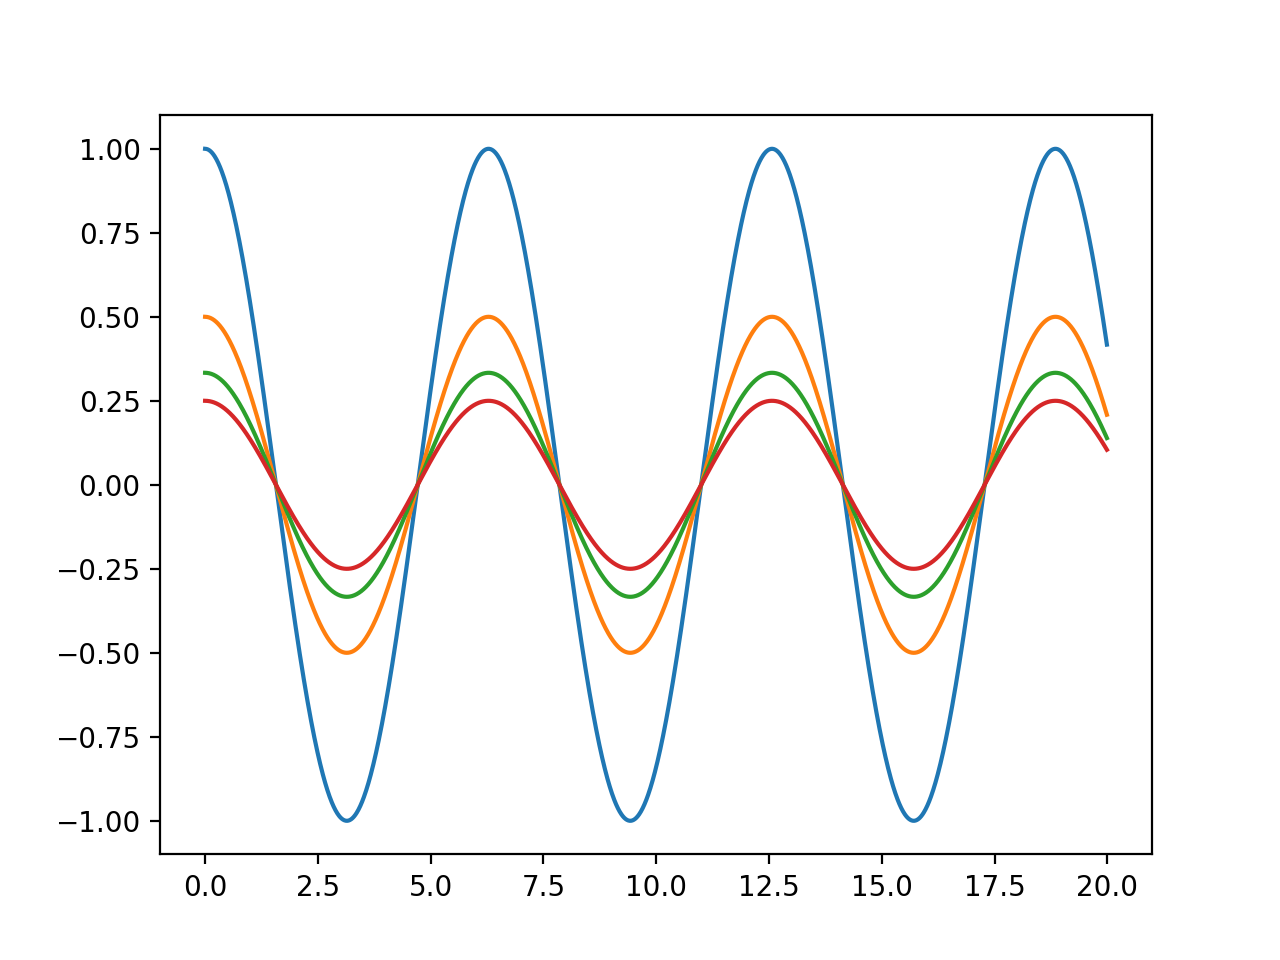

In [95]:
fig = plt.figure()

The most basic plot is plt.plot, which plots two lists or numpy arrays as a line plot.

In [96]:
x = np.arange(0,20,.01)
y = np.cos(x)
plt.plot(x,y);

Behind the scenes, Matplotlib knows what the current figure and current axes. You can either plot on the current axis as a function in matplotlib or as a class method on an axis object. Notice that the code below affects the figure above. 

In [97]:
ax = plt.gca()
ax.plot(x,y/2)
p1 = plt.plot(x,y/3)
p2 = plt.plot(x,y/4, axes=ax)

Everything in the plot is an object and it has methods and properties.

In [98]:
print type(fig)
print type(ax)
print type(p1[0])

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.lines.Line2D'>


## Manipulating and customizing plots
Matplotlib has an easy shorthand for customizing basic plot marker properties. For more, [see here.](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

<IPython.core.display.Javascript object>


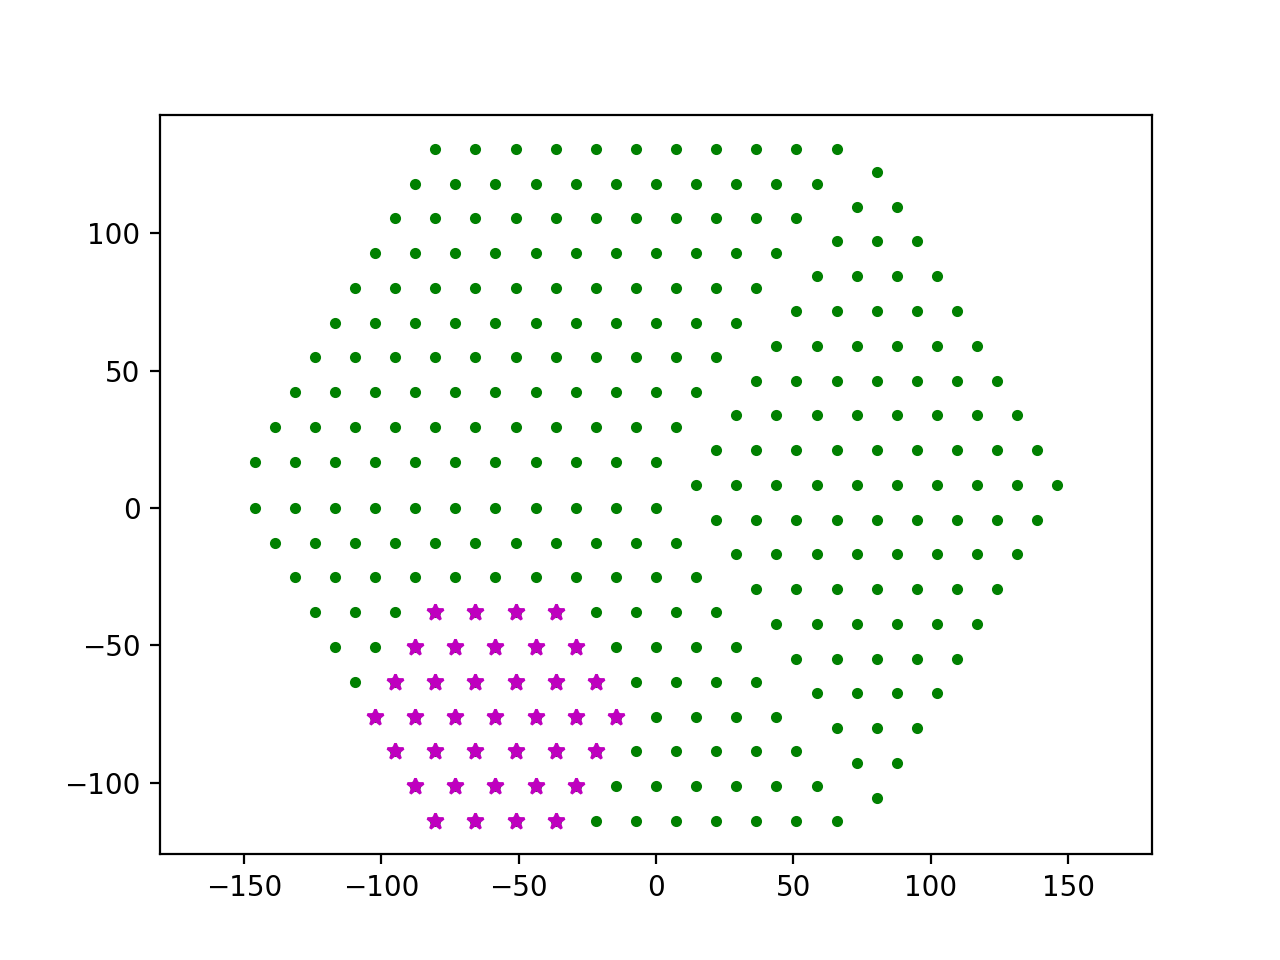

In [99]:
plt.figure()
plt.axis('equal')
hera37 = np.loadtxt('antenna_positions_37.txt')
hera350 = np.loadtxt('antenna_positions_350.txt')
plt.plot(hera350[0:320,0], hera350[0:320,1],'g.') #green dots
plt.plot(hera37[:,0], hera37[:,1],'m*'); #magenta stars

The next thing you want to do to a plot is make it understandable. That means adding labels and legends.

<IPython.core.display.Javascript object>


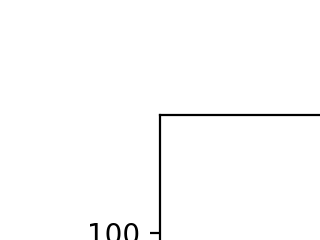

In [100]:
fig = plt.figure()
plt.axis('equal')
plt.plot(hera350[0:320,0], hera350[0:320,1],'.', label='HERA-320')
plt.plot(hera37[:,0], hera37[:,1],'*', ms=10, label='HERA-37')
plt.legend(loc='best')
#plt.legend(loc='upper right')
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.title("HERA's Phased Build-out of Dishes")
plt.annotate('Start\nbuilding\nhere.', xy=hera37[-4,0:2], xytext=(-170, -100), arrowprops={'facecolor':'black'});

## Saving figures
Generally use PDFs for vector images and pngs for bitmaps. Just change the extension of the filename. You can affect resolution, transparency, padding, and so one with keyword arguments.

In [101]:
plt.savefig('hera_buildout.png')
plt.savefig('hera_buildout.pdf')

## Subplots
There's also an easy way to create and manipulate subplots. 

<IPython.core.display.Javascript object>


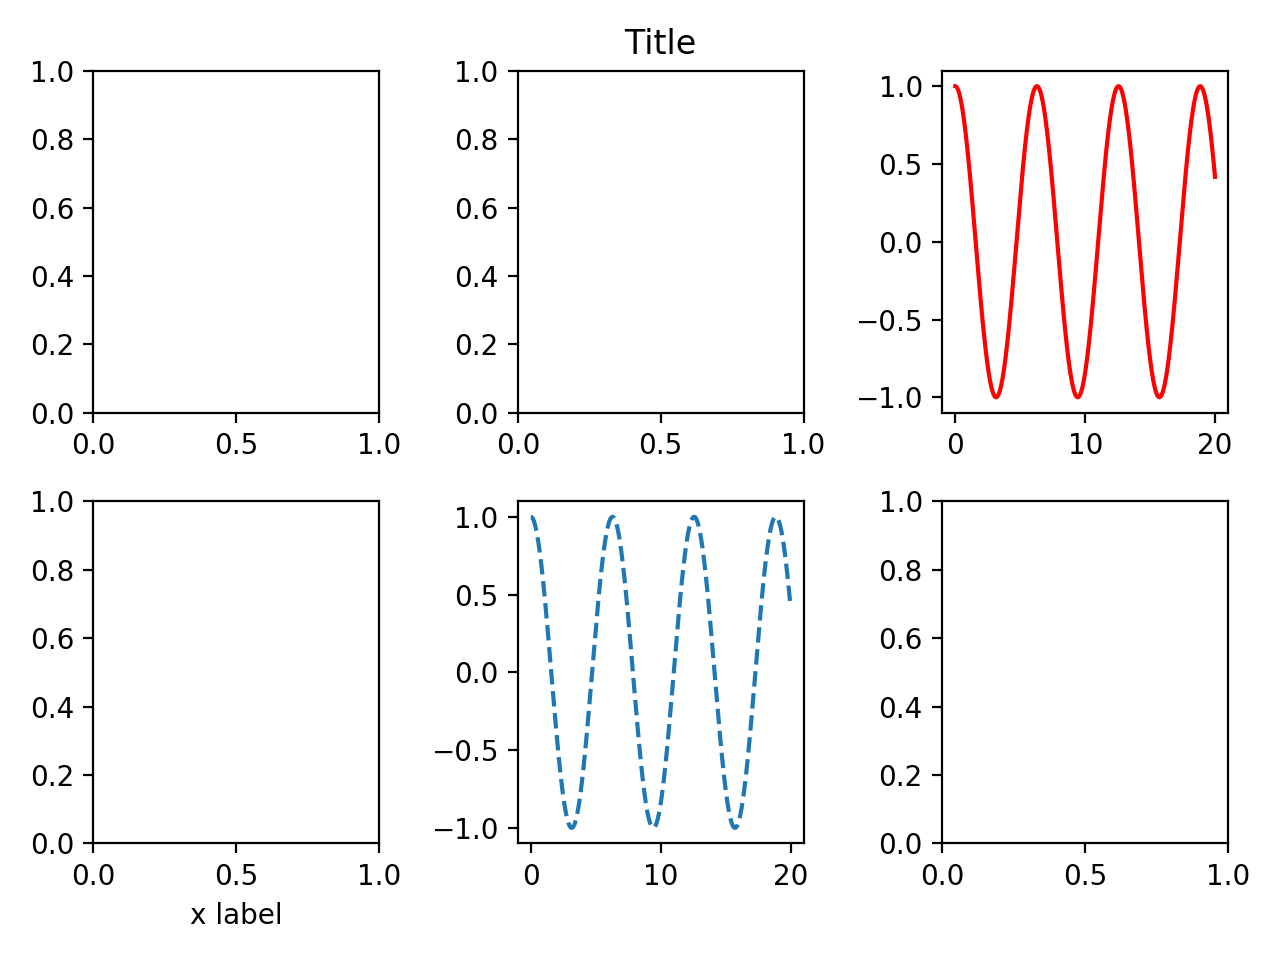

In [102]:
fig, axes = plt.subplots(2,3)
x = np.arange(0,20,.01)
y = np.cos(x)
axes[1,1].plot(x,y,'--')
axes[0,2].plot(x,y,'r-')
axes[1,0].set_xlabel('x label')
axes[0,1].set_title('Title')
plt.tight_layout()

## Other useful plot types

### Log and semilog plots

<IPython.core.display.Javascript object>


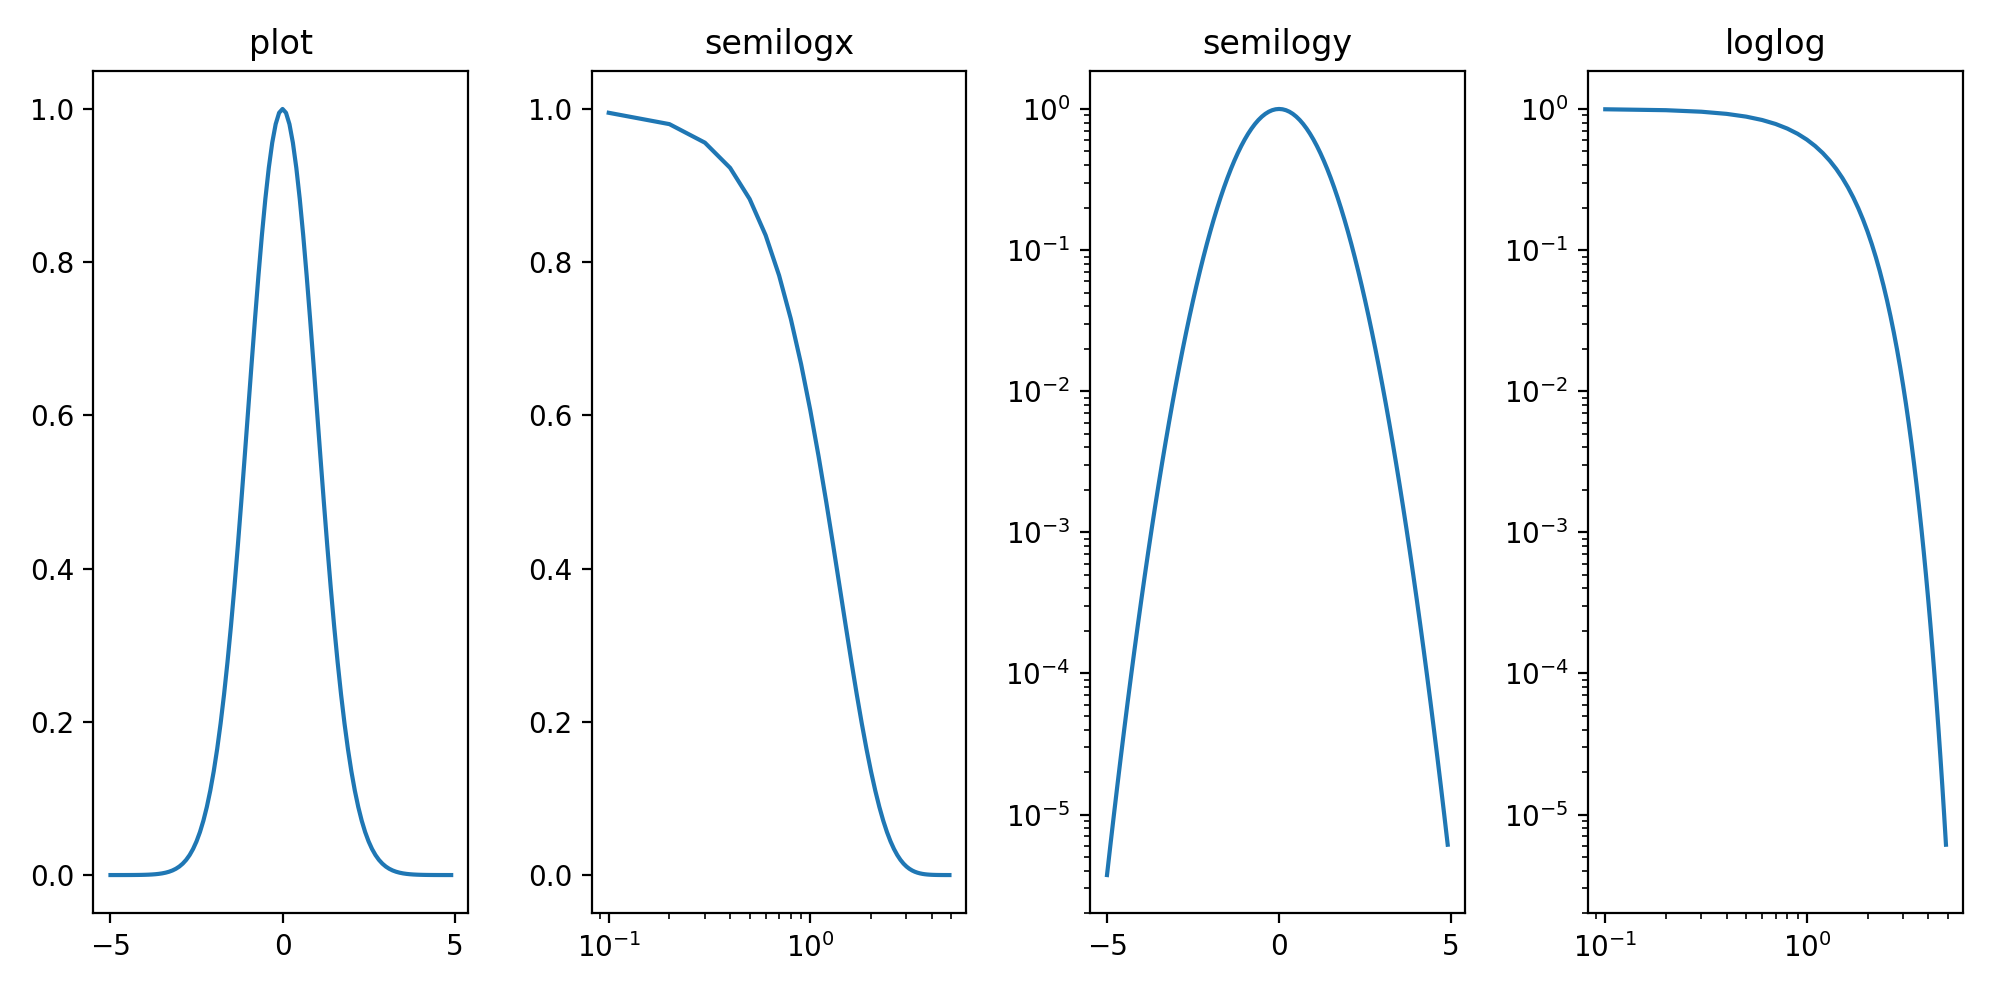

In [104]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,5))
x = np.arange(-5,5,.1)
y = np.exp(-x**2/2)
ax1.plot(x,y); ax1.set_title('plot')
ax2.semilogx(x,y); ax2.set_title('semilogx')
ax3.semilogy(x,y); ax3.set_title('semilogy')
ax4.loglog(x,y); ax4.set_title('loglog')
plt.tight_layout()

### Histograms

<IPython.core.display.Javascript object>


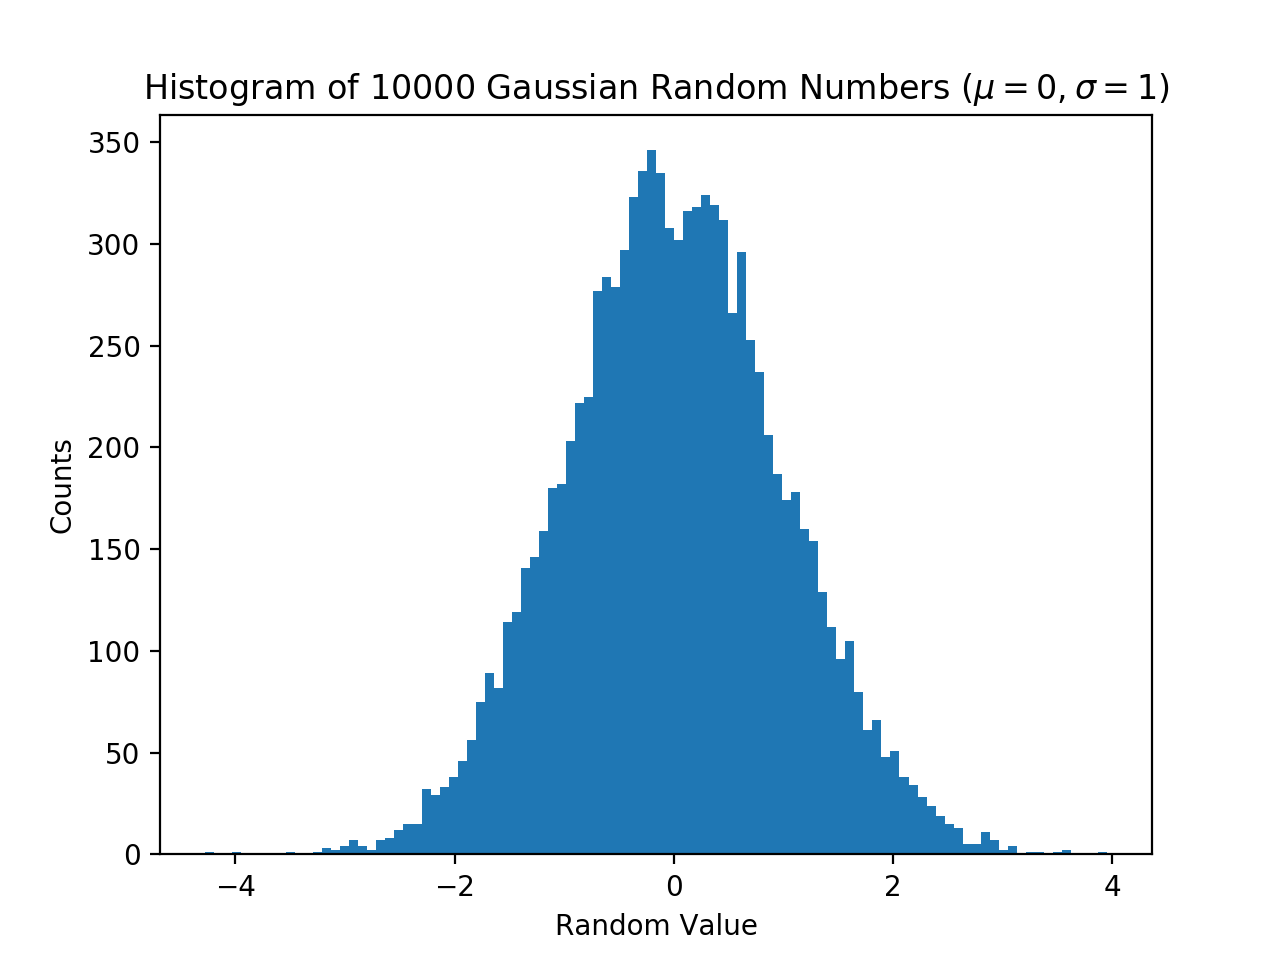

In [105]:
plt.figure()
x = np.random.randn(10000)
plt.hist(x,bins=100)
plt.title('Histogram of 10000 Gaussian Random Numbers ($\mu=0, \sigma=1$)')
plt.xlabel('Random Value'); plt.ylabel('Counts');

### Error bars

<IPython.core.display.Javascript object>


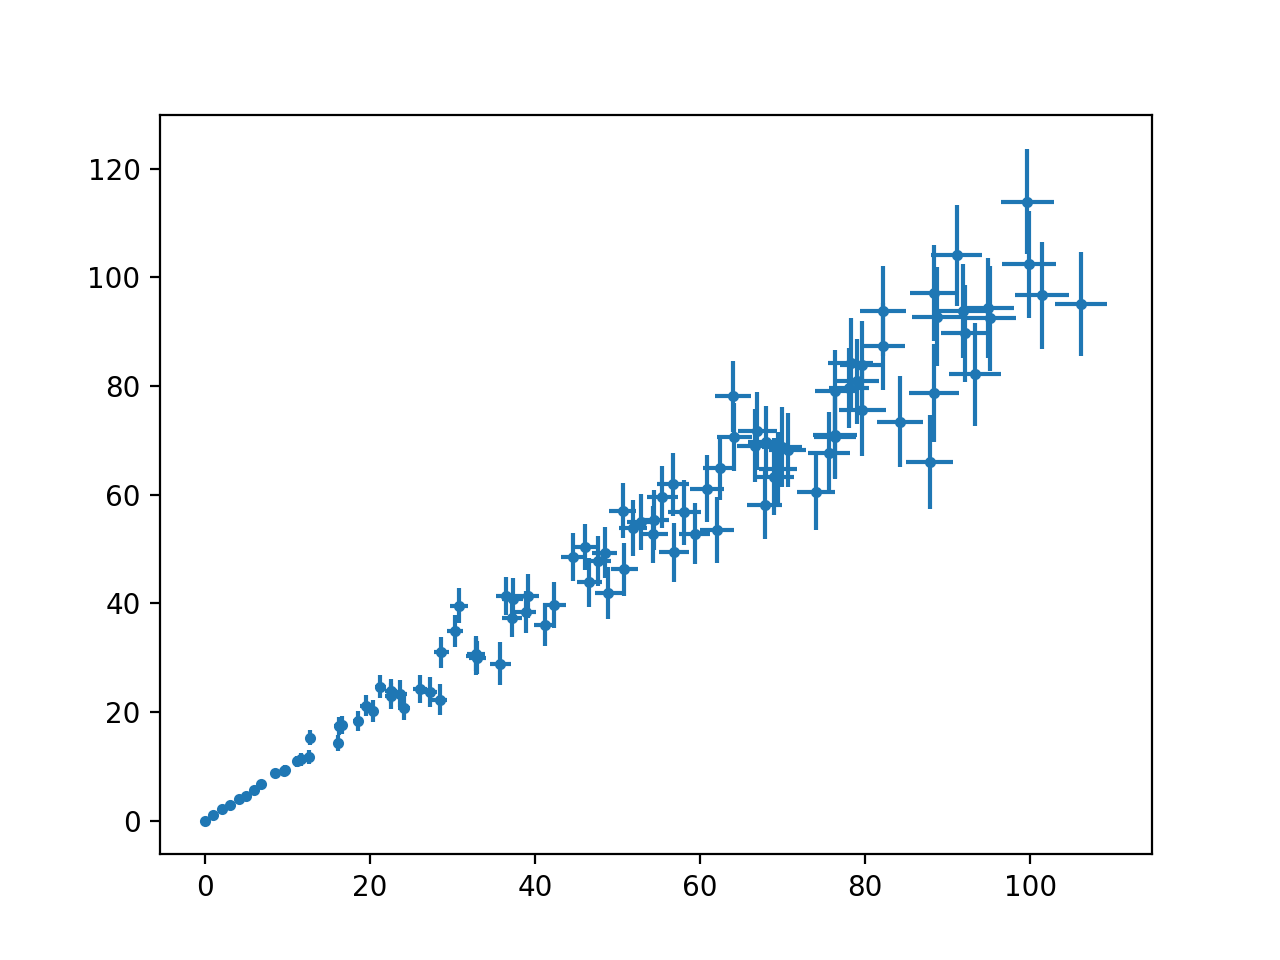

<Container object of 3 artists>

In [106]:
N = 100
x = 1.0*np.arange(N)
y = 1.0*np.arange(N)
xerr = x/30
yerr = y/10
x += np.random.randn(N)*xerr
y += np.random.randn(N)*yerr
plt.figure()
plt.errorbar(x,y,fmt='.',yerr=yerr, xerr=xerr)

### Images

<IPython.core.display.Javascript object>


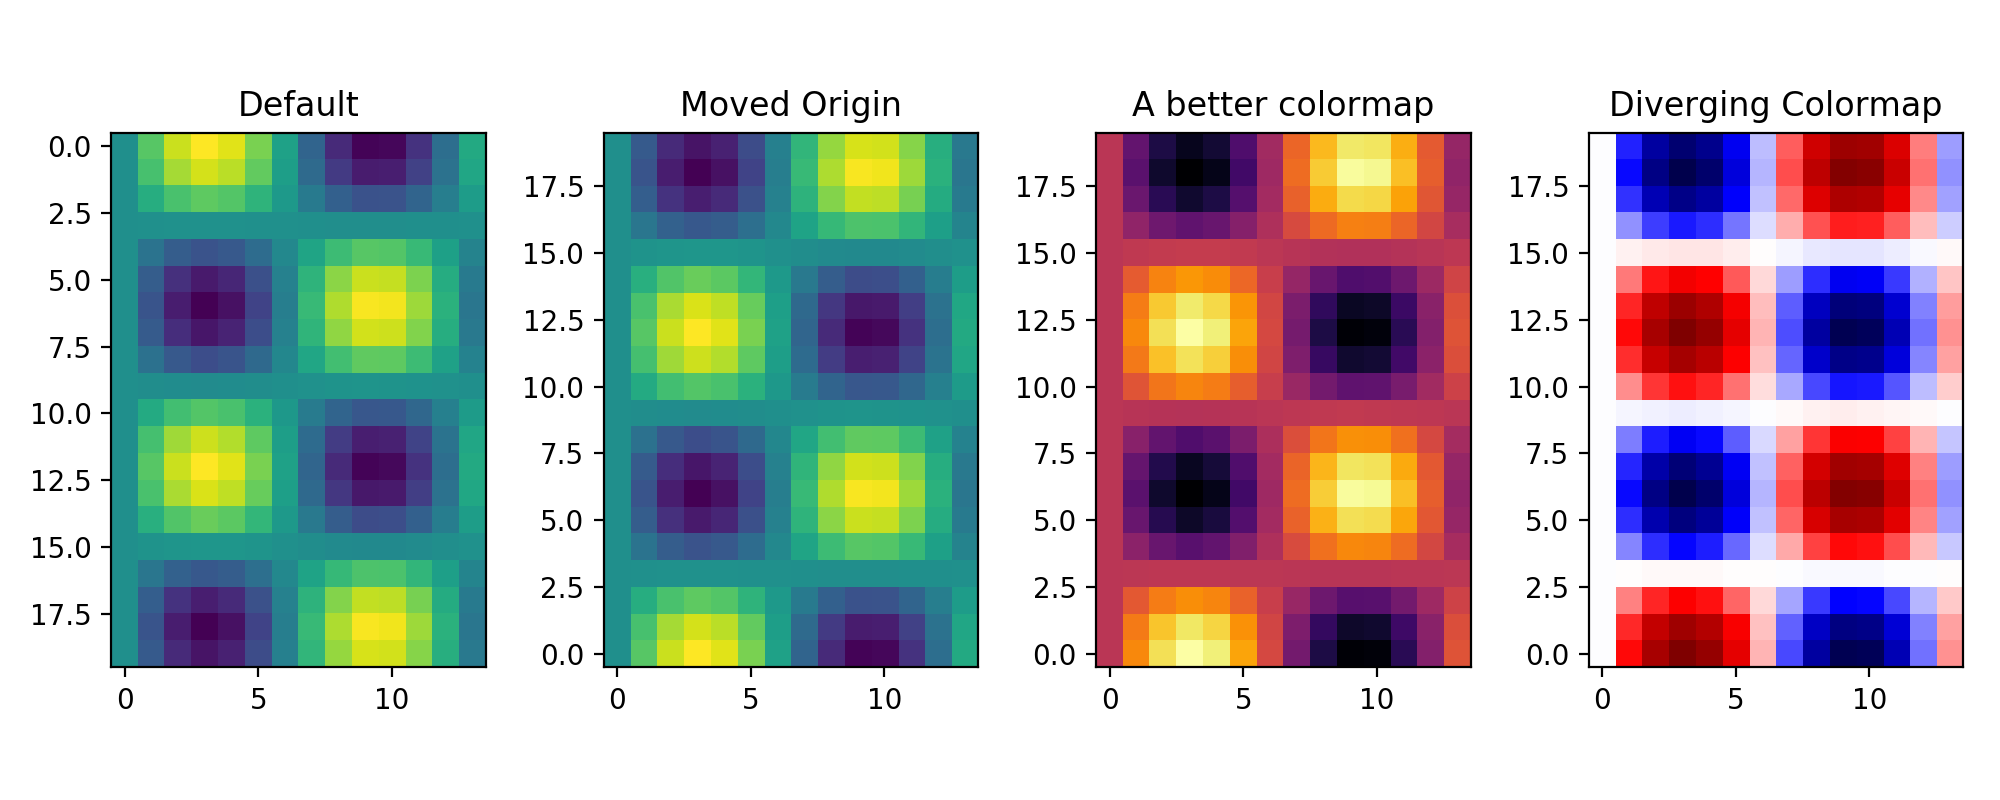

In [107]:
x, y = np.meshgrid(np.arange(14), np.arange(20))
z = np.sin(0.5*x)*np.cos(0.52*y)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,4))

ax1.imshow(z); ax1.set_title('Default')
ax2.imshow(z,interpolation='none', origin='lower'); ax2.set_title('Moved Origin')
ax3.imshow(z,interpolation='none',origin='lower',cmap='inferno'); ax3.set_title('A better colormap')
ax4.imshow(z,interpolation='none',origin='lower',cmap='seismic'); ax4.set_title('Diverging Colormap')
plt.tight_layout()

### Scatter plots and colorbars

<IPython.core.display.Javascript object>


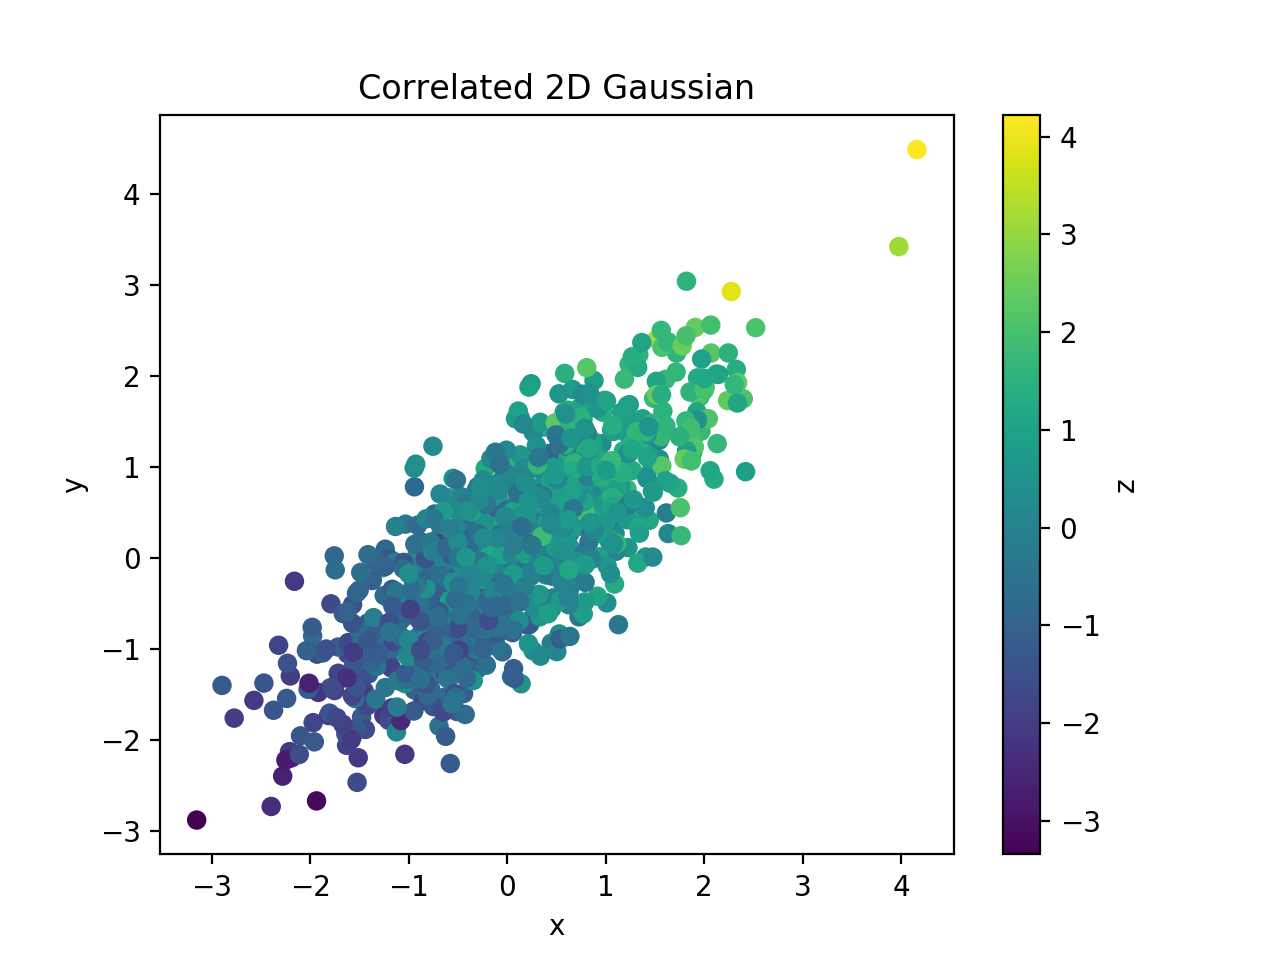

In [108]:
plt.figure()
mv_gauss = np.random.multivariate_normal([0,0,0], [[1,.8,.8],[.8,1,.8],[.8,.8,1]],1000)
plt.scatter(mv_gauss[:,0],mv_gauss[:,1], c=mv_gauss[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.colorbar(label='z')
plt.title('Correlated 2D Gaussian');

### 3D plots
This is a 3D scatter plot example, but there are [many more](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html), including lines, surfaces, bars, contours, etc.

<IPython.core.display.Javascript object>


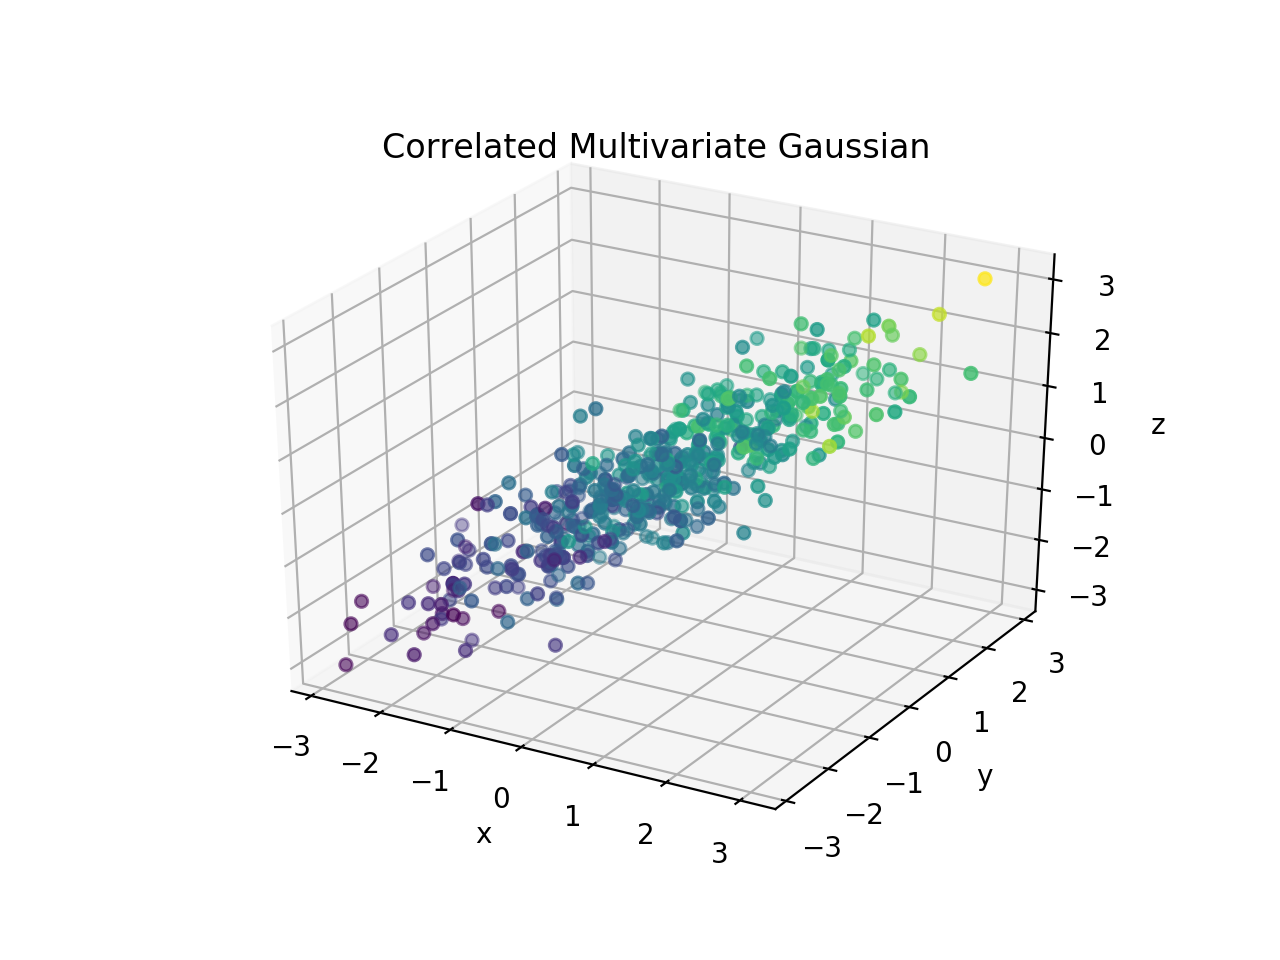

In [109]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mv_gauss = np.random.multivariate_normal([0,0,0,0], [[1,.8,.8,.8],[.8,1,.8,.8],[.8,.8,1,.8],[.8,.8,.8,1]],500)
ax.scatter3D(mv_gauss[:,0],mv_gauss[:,1], mv_gauss[:,2], c=mv_gauss[:,3])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.title('Correlated Multivariate Gaussian');

## CODING BREAKOUT: Visualizing a radio source catalog

In this exercise you will make a plot showing the properties of point sources 

You should find GLEAM_Catalog_150MHz.npz in the same folder as this notebook. This catalog was created with the [Murchison Widefiled Array](http://www.mwatelescope.org/science/gleam-survey). Load it in using numpy. It should contain four data vectors:
* 'RAs': the right ascension of each object
* 'decs': the declination of each object
* 'fluxes': the brightness of each object in Janskies at 150 MHz
* 'spIndices': the spectral index $\alpha$ of each object, so that it's flux $S(\nu) = S(150\text{ MHz}) \left(\frac{\nu}{150\text{ MHz}}\right)^{-\alpha}$

**Plot right-ascension vs. declination of all point sources above 5 Jy, with marker sizes based flux and colors based on spectral index.**  If you have extra time, try to add a colorbar and label it appropriately.

**Hint:** plt.scatter() has keyword arguments 's' and 'c' for size and color.




In [110]:
#Try out your solution here.

# Other useful packages: Scipy, Astropy, Healpy

There are lots of useful packages that can help you do what you want. These three I just want to make you vaguely familiar with.

In [111]:
import scipy
import astropy
import healpy

## Scipy
[Scipy](https://docs.scipy.org/doc/scipy-0.19.0/reference/) is a powerful tool with a lot of built-in mathematical capabilities. Scipy is developed along with numpy and generally very interoperable with numpy. As a little taste of what it does, scipy is useful for:
* Root-finding, minimization, optimization
* Curve fitting
* Numerical integration and ordinary differential equation solving
* Special functions
* Signal processing
* Interpolation
* Linear algebra and sparse matrices
* Advanced statistics
* Lots more...

## Astropy

[Astropy](http://www.astropy.org/) is a collection of methods particularly useful to astronomy that are good to be generally aware of. These include:
* File I/O (especially FITS)
* Dates and times
* Astronomical Coordinate Systems
* Physical and astrophysical constants
* Cosmology calculations
* Astrostatistics
* Lots more...


## Healpy

The [Healpy package](https://healpy.readthedocs.io/en/latest/) is a convienet way of plotting and manipulating maps in the [HEALPix (Heirarchical Equal-Area isoLatitude Pixelization)](http://healpix.jpl.nasa.gov/) format. This is a very nice way pixelizing a sphere, which is useful in widefield radio astronomy.

HEALPix maps have an NSIDE parameter which is a power of 2 which determines the level of pixelization.

![](Images/healpix.jpg)

Healpy comes with a number of plotting scripts, including Mollview, which performs the [Mollweide Projection](https://en.wikipedia.org/wiki/Mollweide_projection)

<IPython.core.display.Javascript object>


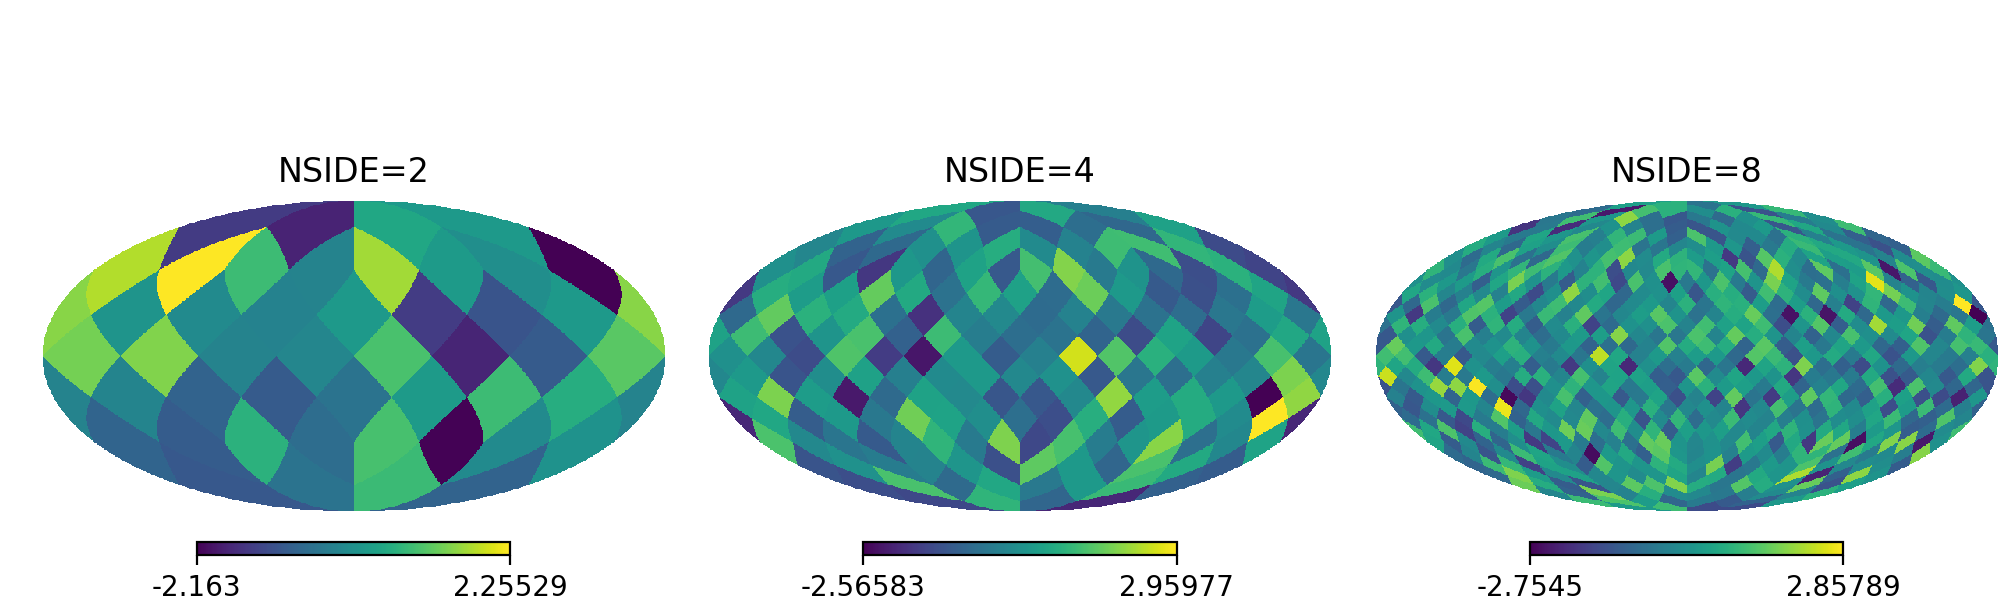

In [112]:
fig = plt.figure(figsize=(10,3))
healpy.mollview(np.random.randn(12*2**2), fig=fig.number, sub=131, title='NSIDE=2')
healpy.mollview(np.random.randn(12*4**2), fig=fig.number, sub=132, title='NSIDE=4')
healpy.mollview(np.random.randn(12*8**2), fig=fig.number, sub=133, title='NSIDE=8')

## CODING BREAKOUT: Plot the Global Sky Model as a function of frequency

The [Global Sky Model (GSM)](http://space.mit.edu/~angelica/gsm/index.html) is a simplified map of the temperautre (in K) of diffuse radio emission, most of which comes from the plane of the galaxy. It includes three spatial maps each of which has a different relative importance at different frequencies. To compute the global sky model at an arbitrary frequency, we use the following formula:

$T_{GSM}(\nu,\theta,\phi) = T(\nu) * \sum_{n=0}^{n=2} W_n(\nu) M_n(\theta,\phi)$

In our case, we have three Healpix maps, and weights $W_n$ specified at a range of frequencies. We've loaded and plotted them below.

Now, **finish the function GlobalSkyModel below so that you can map the GSM at an arbitrary frequency using the above formula.**

**Hint:** you may find scipy.interpolate.interp1d() helpful. For best results, try a cublic spline (kind='cubic') with $\log(\nu)$ and $\log(T)$.

In [ ]:
map0 = np.load('GSM/GSM_NSIDE-64_Comp-0.npy')
map1 = np.load('GSM/GSM_NSIDE-64_Comp-1.npy')
map2 = np.load('GSM/GSM_NSIDE-64_Comp-2.npy')
comps = np.loadtxt('GSM/components.dat')

#Plot Healpix Maps
fig = plt.figure(figsize=(10,3))
healpy.mollview(np.log10(map0), fig=fig.number, sub=131, title='log$_{10}$(Map0)')
healpy.mollview(map1, fig=fig.number, sub=132, title='Map1')
healpy.mollview(map2, fig=fig.number, sub=133, title='Map2')

freqs = comps[:,0]
temps = comps[:,1]
W0,W1,W2 = comps[:,2], comps[:,3], comps[:,4]

#Plot temperature normalization
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.loglog(freqs,temps,'.-')
ax1.set_xlabel('Freq (MHz)')
ax1.set_ylabel('Temperature Normalization (K)')

#Plot all weights
for n,comp in enumerate([W0,W1,W2]): ax2.semilogx(freqs,comp,'.-',label=n)
ax2.set_xlabel('Freq (MHz)')
ax2.set_ylabel('Weights')
plt.legend()
plt.tight_layout() #Makes room for axis labels

In [113]:
from scipy.interpolate import interp1d

def GlobalSkyModel(f, maps, freqs, temps, components):
    "Try out your solution here."
    return GSM

In [ ]:
#Now plot it using it mollview
freq = 150 #MHz
GSM = GlobalSkyModel(freq, [map0, map1, map2], freqs, temps, [W0, W1, W2])
fig = plt.figure()
healpy.mollview(np.log10(GSM), fig=fig.number, title='GSM at '+str(freq)+' MHz', unit='log$_{10}$[T (K)]')

### Extra challenge homework: Interpolate the GSM onto Horizontal Coordinates

* First use [pix2ang](http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.pix2ang.html) to figure out the RA and dec of each pixel in an empty healpix map
* Next convert those coordiantes to galactic coordinates using [astropy's built-in coordinate conversion](http://docs.astropy.org/en/stable/coordinates/).
* Next use those angles and [get_interp_val](http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.get_interp_val.html) to populate using the map generated above by GlobalSkyModel().

The solution should look like [this](https://casper.berkeley.edu/astrobaki/index.php/Radio_Sky):
![](Images/haslam.png)